# Introduction

The timeseries module provides the TimeSeries class which deals with all 1D timeseries (sizedistribution timeseries are considered 2D timeseries and are delt with in a different place). Usually when reading in any type of data, that is in some way a time series it will end up beeing a TimeSeries instance. Data in a TimeSeries is stored at TimeSeries.data in form of a pandas DataFrame instance.

# Imports

In [1]:
from atmPy.aerosols.instruments.POPS import housekeeping
from atmPy.aerosols.instruments.piccolo import piccolo
# %matplotlib nbagg
%matplotlib inline

# Some usefull features of the TimeSeries class

## Read (generate) TimeSeries

Usually a TimeSeries is generated when data representing a timeseries is loaded, e.g. POPS housekeeping data, or piccolo telemetry data.

In [2]:
pops_hk = housekeeping.read_csv('./data/POPS_housekeeping.csv')
picco_tel = piccolo.read_csv('./data/piccolo.log')

reading ./data/POPS_housekeeping.csv


## merge TimeSeries instances with different time axes

This attribute of a TimeSeries class allows the projection of a different instance on the current one. The resulting instance will have the collumns of both instances but with the time axes according to the first instance.

In [3]:
pops_hk_merged = pops_hk.merge(picco_tel)
# pops_hk_merged.data

After merging it is possible to plot for example the Particle rate as a function of altitude. Columns which where previously in different Timeseries with different time intervals and time values.

<IPython.core.display.Javascript object>


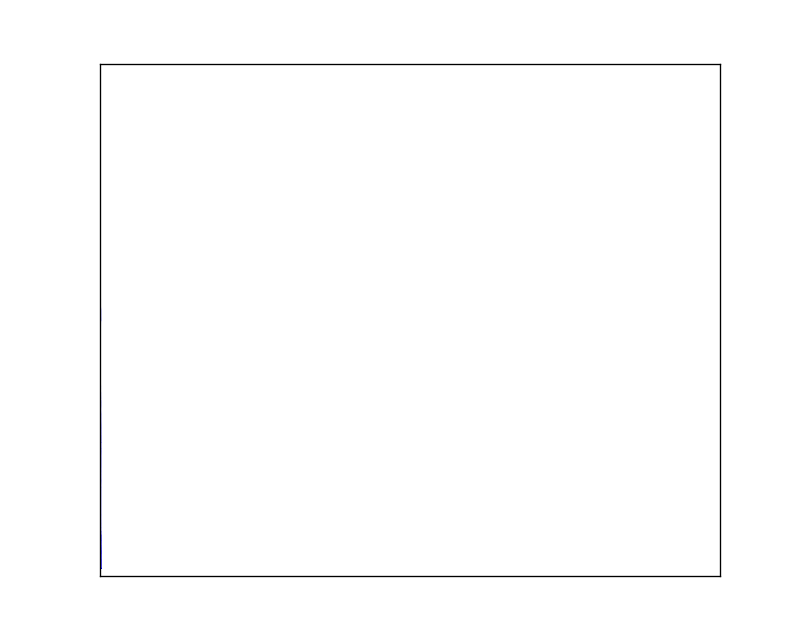

In [4]:
f,ax = plt.subplots()
ax.plot(pops_hk_merged.data.Particle_rate_nops, pops_hk_merged.data.Altitude)
ax.set_ylabel('Altitude (m)')
ax.set_xlabel('Particle rate (#/s)')

## Plot on map (probably not working right now)

When a TimeSeries instance has data columns named 'Lat' and 'Lon' it is possible to do a quick drowing of e.g. fligh path on a map. This uses matplotlib basemap.

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


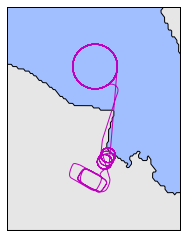

In [36]:
pops_hk_merged.plot_map(resolution = 'f')

# Perform correlations

In [3]:
out = pops_hk.correlate_to(picco_tel, data_column='Particle_rate_nops', correlant_column='Altitude')

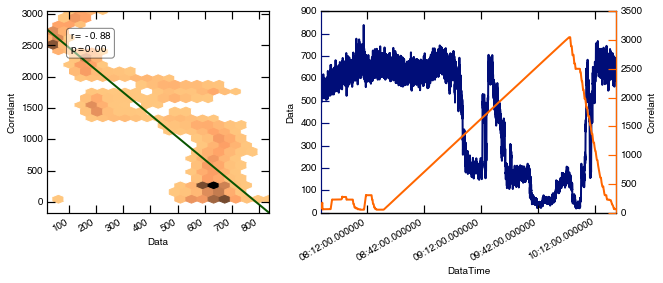

In [7]:
a,a2,a3 = out.plot_pearsonANDoriginal_data(gridsize = 20, xlim=None)

# align data 

In [ ]:
def merge(ts_orig, ts):
    """ Merges current with other timeseries. The returned timeseries has the same time-axes as the current
    one (as opposed to the one merged into it). Missing or offset data points are linearly interpolated.

    Argument
    --------
    ts_orig: the other time series will be merged to this, therefore this timeseries
    will define the time stamps.
    ts: timeseries or one of its subclasses.
        List of TimeSeries objects.

    Returns
    -------
    TimeSeries object or one of its subclasses

    """
    ts_this = ts_orig.copy()
    ts_data_list = [ts_this.data, ts.data]
    catsortinterp = pd.concat(ts_data_list).sort_index().interpolate()
    merged = catsortinterp.groupby(catsortinterp.index).mean().reindex(ts_data_list[0].index)
    ts_this.data = merged
    return ts_this

In [2]:
from atmPy.general import timeseries
from importlib import reload

In [10]:
pops_hk = housekeeping.read_csv('./data/POPS_housekeeping.csv')
pops_hk.data = pops_hk.data.loc[:,['Particle_rate_nops']]
picco_tel = piccolo.read_csv('./data/piccolo.log')
picco_tel.data = picco_tel.data.loc[:,['Lat']]

reading ./data/POPS_housekeeping.csv


<IPython.core.display.Javascript object>


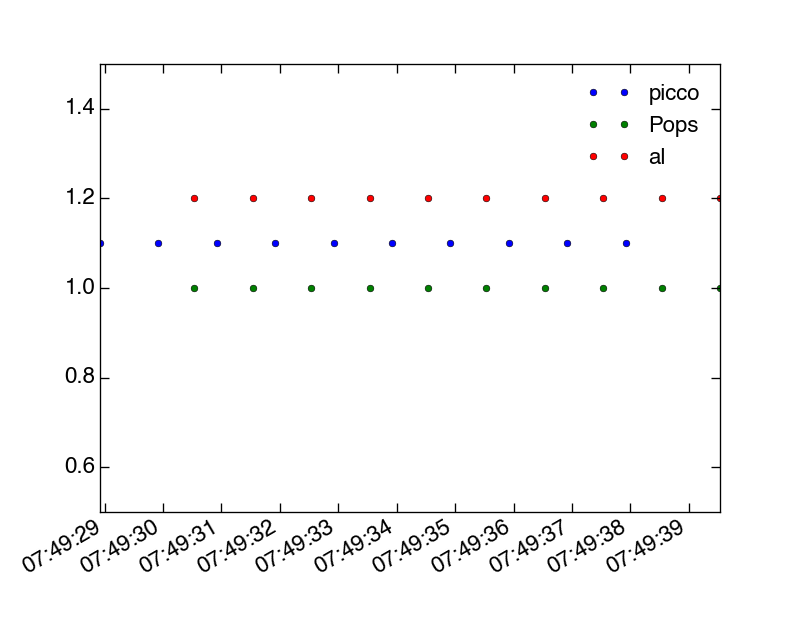

In [11]:
pops_start = 100
pops_hk.data = pops_hk.data.iloc[pops_start:pops_start + 10]
pops_i = pops_hk.data.index
pops_y = np.ones(pops_i.shape)

picco_start = 670
picco_tel.data = picco_tel.data.iloc[picco_start:picco_start + 10]
picco_i = picco_tel.data.index
picco_y = np.ones(picco_i.shape)*1.1


f,a = plt.subplots()
a.plot(picco_i,picco_y, 'o', label = 'picco')
a.plot(pops_i,pops_y, 'o', label = 'Pops')

picco_al = timeseries.align_to(picco_tel,pops_hk)
picco_al_i = picco_al.data.index
picco_al_y =  np.ones(picco_al_i.shape)*1.2
a.plot(picco_al_i, picco_al_y, 'o', label = 'al')


a.legend()
a.set_ylim((0.5,1.5))
f.autofmt_xdate()


In [6]:
picco_al = timeseries.align_to(picco_tel,pops_hk)

In [8]:
picco_al.data

,Lat
Time_UTC,
2015-04-21 07:49:30.533,78.927931
2015-04-21 07:49:31.534,78.927931
2015-04-21 07:49:32.534,78.927931
2015-04-21 07:49:33.534,78.927931
2015-04-21 07:49:34.534,78.927931
2015-04-21 07:49:35.533,78.927931
2015-04-21 07:49:36.533,78.927931
2015-04-21 07:49:37.534,78.927931
2015-04-21 07:49:38.533,78.927931


In [72]:
pops_hk.data

,Particle_rate_nops
Time_UTC,
2015-04-21 07:49:30.533,554
2015-04-21 07:49:31.534,577
2015-04-21 07:49:32.534,532
2015-04-21 07:49:33.534,551
2015-04-21 07:49:34.534,577
2015-04-21 07:49:35.533,550
2015-04-21 07:49:36.533,522
2015-04-21 07:49:37.534,550
2015-04-21 07:49:38.533,518


In [73]:
picco_tel.data

,Lat
2015-04-21 07:49:28.920,78.927931
2015-04-21 07:49:29.920,78.927931
2015-04-21 07:49:30.920,78.927931
2015-04-21 07:49:31.920,78.927931
2015-04-21 07:49:32.920,78.927931
2015-04-21 07:49:33.920,78.927931
2015-04-21 07:49:34.920,78.927931
2015-04-21 07:49:35.920,78.927931
2015-04-21 07:49:36.920,78.927931
2015-04-21 07:49:37.920,78.927931


In [85]:
pops_hk.data = pops_hk.data.loc[:,[]]

In [86]:
new_ts = timeseries.merge(pops_hk, picco_tel)

In [87]:
new_ts.data

,Lat
Time_UTC,
2015-04-21 07:49:30.533,78.927931
2015-04-21 07:49:31.534,78.927931
2015-04-21 07:49:32.534,78.927931
2015-04-21 07:49:33.534,78.927931
2015-04-21 07:49:34.534,78.927931
2015-04-21 07:49:35.533,78.927931
2015-04-21 07:49:36.533,78.927931
2015-04-21 07:49:37.534,78.927931
2015-04-21 07:49:38.533,78.927931


<IPython.core.display.Javascript object>


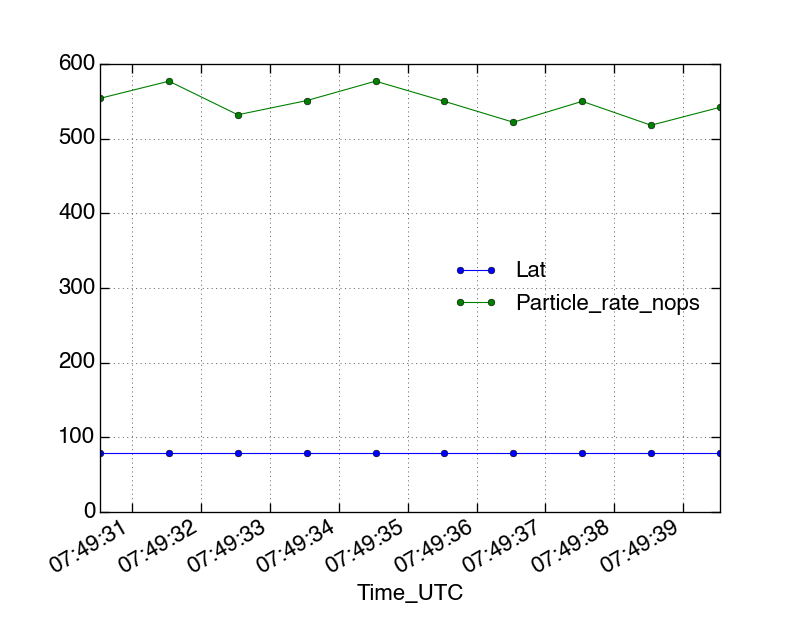

In [80]:
a = new_ts.plot(marker = 'o')
a.grid()